In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [40]:
columns = ['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing (task4).csv', delimiter = '  ', header = None, names = columns)

C:\Users\Chandraraj Singh\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [41]:
df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5


In [42]:
display(df.shape)
display(df.describe())
display(df.info())

(506, 14)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

### There are no NAN values in our dataframe.

<AxesSubplot:>

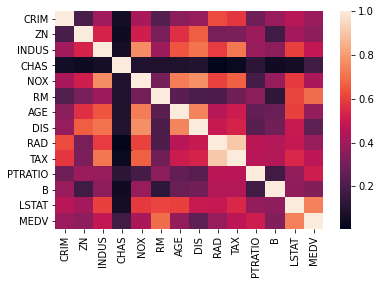

In [43]:
corr = abs(df.corr())
sns.heatmap(corr, cbar=True)

In [44]:
Y = df['MEDV']
df.drop('MEDV', axis = 1, inplace = True)

## Breakdown of each feature :-

crim-
per capita crime rate by town.

zn-
proportion of residential land zoned for lots over 25,000 sq.ft.

indus-
proportion of non-retail business acres per town.

chas-
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox-
nitrogen oxides concentration (parts per 10 million).

rm-
average number of rooms per dwelling.

age-
proportion of owner-occupied units built prior to 1940.

dis-
weighted mean of distances to five Boston employment centres.

rad-
index of accessibility to radial highways.

tax-
full-value property-tax rate per $10,000.

ptratio-
pupil-teacher ratio by town.

black-
1000(Bk - 0.63)^2 where Bk is the proportion of african-american by town.

lstat-
lower status of the population (percent).

target-
median value of owner-occupied homes in $1000s.

### Since features have varying distribution we'll have to normalise them to make sure one feature does not dominate other features on deciding the target value.
### Z-Score or mean normalisation equates the mean of feature to 0 and standard deviation to 1.

In [45]:
#Feature Scaling
#Unscaled features results in dominance of a particular feature/features having higher "weight" 
#and thus reduces the accuracy of the model on data the model is not tested on.
#Performing mean normalisation(Z-Score)
for i in df.columns:
    if i == 'CHAS':
        #We dont normalise a categorical data(chas only has binary values)
        continue
    df[i] = (df[i]-(df[i].mean()))/(df[i].std())
Y = (Y-Y.mean())/Y.std()

In [46]:
#Dataset with normalised values
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,0,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,0,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,0,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,0,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,0,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


### Converting datasets into matrices to execute vectorised Linear Regression

<AxesSubplot:ylabel='MEDV'>

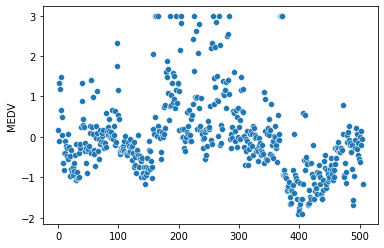

In [47]:
sns.scatterplot(data = Y)

## The above plot shows how the price for houses are capped at 50,000. This can prove to limit the accuracy of our model for houses whose prices are more than 50,000, both on real life and training example. This capping of the highest price is one limitation of the Boston Dataset. 

In [48]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df,Y, test_size = 0.3, random_state = 14)

# Using Linear Regerssion from the SkLearn library

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

In [50]:
y_pred = lr.predict(Xtrain)

In [51]:
print('R^2:',metrics.r2_score(ytrain, y_pred))
print('MSE:',metrics.mean_squared_error(ytrain, y_pred))

R^2: 0.7690398542630641
MSE: 0.23533749224537107


In [52]:
ytest_pred =  lr.predict(Xtest)

In [53]:
print('R^2:',metrics.r2_score(ytest, ytest_pred))
print('MSE:',metrics.mean_squared_error(ytest, ytest_pred))

R^2: 0.6575515330273631
MSE: 0.32183118487148205


## R^2 error for LinearRegression from Sklearn is 0.656

# Using Random Forest Regressor 

In [54]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(Xtrain, ytrain)

RandomForestRegressor()

In [55]:
y_pred = RF.predict(Xtrain)

In [56]:
print('R^2:',metrics.r2_score(ytrain, y_pred))
print('MSE:',metrics.mean_squared_error(ytrain, y_pred))

R^2: 0.9806681985138062
MSE: 0.019698193676791726


In [57]:
ytest_pred = RF.predict(Xtest)

In [58]:
print('R^2:',metrics.r2_score(ytest, ytest_pred))
print('MSE:',metrics.mean_squared_error(ytest, ytest_pred))

R^2: 0.7921855407735205
MSE: 0.195302885241499


## R^2 error for RandomForestRegressor is 0.786

# Vectorized Linear Regression

In [59]:
x = df.to_numpy()                      #Converting dataset into a 2D array
y = Y.to_numpy()                       #Converting taget variable into a 2D array
print(x.shape, y.shape)
numExamples = x.shape[0]
numFeatures = x.shape[1]

(506, 13) (506,)


In [60]:
x = np.append(np.ones((numExamples,1)),x, axis = 1)   #Adding unit bias
x.shape

(506, 14)

In [61]:
theta = np.zeros((numFeatures + 1,1))                 #Initializing theta values as 0.
theta.shape

(14, 1)

In [62]:
iterations = [200,300,400,500,700,600,1000]
alpha = [.001 , .003, .01, .03, .1 ,.3]
for i in iterations:
    for j in alpha:
        for iters in range(i):
                h= x@theta                                              #Hypothesis Function
                y = np.reshape(y, (len(y),1))
                error = h-y
                J = ((error**2).sum())*(1/(2*y.shape[0]))          #Cost Function 
                gradient = (x.T@error)*(j/y.shape[0])              #Gradient
                theta = theta-gradient                                  #simultaneously updating theta
        print("for",i,"interations and alpha =",j, "cost is",J.sum())
        theta = np.zeros((numFeatures + 1,1))                           #Resetting the values of theta to zeros

for 200 interations and alpha = 0.001 cost is 0.2691367575856063
for 200 interations and alpha = 0.003 cost is 0.19035074445725347
for 200 interations and alpha = 0.01 cost is 0.14405155443840634
for 200 interations and alpha = 0.03 cost is 0.1342058226862044
for 200 interations and alpha = 0.1 cost is 0.12987632003631178
for 200 interations and alpha = 0.3 cost is 0.129423854594724
for 300 interations and alpha = 0.001 cost is 0.23646122168889072
for 300 interations and alpha = 0.003 cost is 0.16830520521517908
for 300 interations and alpha = 0.01 cost is 0.13930759342432414
for 300 interations and alpha = 0.03 cost is 0.13206187904690006
for 300 interations and alpha = 0.1 cost is 0.12952973186064015
for 300 interations and alpha = 0.3 cost is 0.12942240624414472
for 400 interations and alpha = 0.001 cost is 0.21611299677466966
for 400 interations and alpha = 0.003 cost is 0.15645466685099302
for 400 interations and alpha = 0.01 cost is 0.13695705794583116
for 400 interations and alp

Text(0.5, 1.0, 'Cost function constantly decreases with increase in number of iterations')

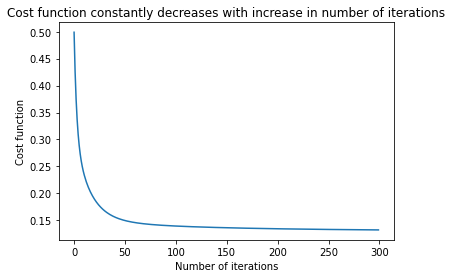

In [63]:
#Choosing the optimal combination of number of iterations and alpha. (300,.03)
theta = np.zeros((numFeatures + 1,1))
iterations = 300
alpha = 0.03
J_History = np.zeros((iterations, 1))
theta_history = np.zeros((iterations,len(theta)))
for i in range(iterations):
    h= x@theta                                                    #Hypothesis Function
    y = np.reshape(y, (len(y),1)) 
    error = h-y
    J = ((error**2).sum())*(1/(2*y.shape[0]))                #Cost Function
    gradient = (x.T@error)*(alpha/y.shape[0])                #Gradient
    theta = theta-gradient
    J_History[i] = J.sum()                                        #Appending values of Cost Function to the array
plt.plot(range(iterations), J_History)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('Cost function constantly decreases with increase in number of iterations')

### We can see the curve constantly decreases

In [64]:
xtest = Xtest.to_numpy()
Ytest = ytest.to_numpy()

In [65]:
xtest = np.append(np.ones((xtest.shape[0],1)),xtest, axis = 1)

In [66]:
xtest.shape

(152, 14)

In [73]:
h = x@theta

In [74]:
print('R^2:',metrics.r2_score(y, h))
print('MSE:',metrics.mean_squared_error(y, h))

R^2: 0.7353824855952766
MSE: 0.26409455489008943


## R^2 error for Vectorized implementation is 0.737